In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('covid.csv')
df

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,1,30/01/20,Kerala,1,0,0,0
1,2,31/01/20,Kerala,1,0,0,0
2,3,01/02/20,Kerala,2,0,0,0
3,4,02/02/20,Kerala,3,0,0,0
4,5,03/02/20,Kerala,3,0,0,0
...,...,...,...,...,...,...,...
265,266,21/03/20,Jammu and Kashmir,4,0,0,0
266,267,21/03/20,Ladakh,13,0,0,0
267,268,21/03/20,Uttar Pradesh,23,1,9,0
268,269,21/03/20,Uttarakhand,3,0,0,0


In [3]:
df = df.drop(columns=['Sno'])

In [4]:
df

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,30/01/20,Kerala,1,0,0,0
1,31/01/20,Kerala,1,0,0,0
2,01/02/20,Kerala,2,0,0,0
3,02/02/20,Kerala,3,0,0,0
4,03/02/20,Kerala,3,0,0,0
...,...,...,...,...,...,...
265,21/03/20,Jammu and Kashmir,4,0,0,0
266,21/03/20,Ladakh,13,0,0,0
267,21/03/20,Uttar Pradesh,23,1,9,0
268,21/03/20,Uttarakhand,3,0,0,0


In [5]:
dates_with_states = df.groupby(['Date','State/UnionTerritory']).sum()
print(dates_with_states.head())

                               ConfirmedIndianNational  \
Date     State/UnionTerritory                            
01/02/20 Kerala                                      2   
01/03/20 Kerala                                      3   
02/02/20 Kerala                                      3   
02/03/20 Delhi                                       1   
         Kerala                                      3   

                               ConfirmedForeignNational  Cured  Deaths  
Date     State/UnionTerritory                                           
01/02/20 Kerala                                       0      0       0  
01/03/20 Kerala                                       0      0       0  
02/02/20 Kerala                                       0      0       0  
02/03/20 Delhi                                        0      0       0  
         Kerala                                       0      0       0  


In [6]:
df.head()

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0,30/01/20,Kerala,1,0,0,0
1,31/01/20,Kerala,1,0,0,0
2,01/02/20,Kerala,2,0,0,0
3,02/02/20,Kerala,3,0,0,0
4,03/02/20,Kerala,3,0,0,0


In [7]:
df = df.drop(columns=['State/UnionTerritory'])
df['Total'] = df.ConfirmedIndianNational+df.ConfirmedForeignNational+df.Cured+df.Deaths

In [8]:
df = df.drop(columns=['ConfirmedIndianNational','ConfirmedForeignNational','Cured','Deaths'])
df = df.groupby('Date',sort=False).sum().reset_index()

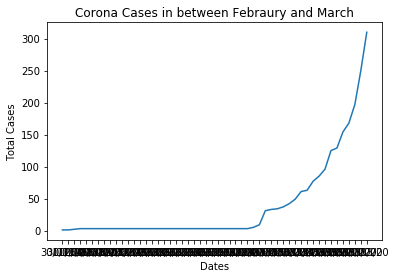

In [9]:
plt.plot(df['Date'],df['Total'])
plt.xlabel('Dates')
plt.ylabel('Total Cases')
plt.title('Corona Cases in between Febraury and March')
plt.show()